## Drug Discovery: Computational Prediction of Bioactivity of Molecules for COX-2 Inhibition and Modulation

Treating the right patient with the right type biologic molecule(s), and therefore observing biologic response has become a major point of interest in drug synthesis. Nowadays, biological response of drugs in the event manufacture has allowed for instant prediction using machine learning algorithms.

A variety of response outcomes is utilized in the different clinical trials, as well as a huge range of potential predicting factors. Also, regarding the timing of the response evaluation, there are considerable differences ([source 6](doi:10.1016/j.bcp.2020.113978)).

![](https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs42003-020-0858-8/MediaObjects/42003_2020_858_Fig1_HTML.png)


Most drugs entering clinical trials fail, often related to an incomplete understanding of the mechanisms governing drug response. Machine learning techniques hold immense promise for better drug response predictions, but most have not reached clinical practice due to their lack of interpretability and their focus on monotherapies ([source 10](10.1016/j.ccell.2020.09.014)).

In machine learning, we mainly deal with two kinds of problems that are classification and regression. There are several different types of algorithms for both tasks. But we need to pick that algorithm whose performance is good on the respective data. Supervised machine learning algorithms are increasingly being applied to the omics profiles as they enable integrative analyses among the high-dimensional data sets, as well as personalized predictions of therapy responses using multi-omics panels of response-predictive biomarkers identified through feature selection and cross-validation ([source 11](10.1007/s12551-018-0446-z)). Several algorithms have shown very good results in terms of classification. Most of these algorithms give high accuracy and fast speed. Most commomly applied models are the XGBClassifier, GradientBoostingCLassifier, and RandomForestCLassifier algorithms, and these are majorly used tp win Kaggle competition and achieve higher accuracy compared to other similar algorithms. 

Through this project, we will explore several Scikit-Learn ML algorithms and implement the best as a model on the bioactivity dataset. The performance and predictive power of the model will be determined. We will then see how the algorithm works in predicting (classifying) the response of a `biomolecule`. Classification of biomolecule on the test dataset is either *`active` (1)* or *`inactive` (0)*. We will then evaluate the model accuracy, get the important features and improve on the model accuracy to get better at predicting the test dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('darkgrid')
import time
import warnings
warnings.filterwarnings('ignore')
import jovian
from PIL import Image
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
#from chembl_webresource_client.new_client import new_client

* **Search for Target protein and organism**

In [2]:
#query = new_client.target
#target_query = query.search('Cyclooxygenase-2')
#data = pd.DataFrame.from_dict(target_query)
#data

In [3]:
#data.to_csv('CHEMBL_Search_for_Cyclooxygenase-2.csv', index = False)

In [4]:
#new_data = pd.read_csv('CHEMBL_Search_for_Cyclooxygenase-2.csv')
#new_data

* **Select and retrieve bioactivity data for protein kinase c alpha**

In [5]:
#new_data.loc[new_data['target_chembl_id'] == 'CHEMBL230']

* **Here, we will retrieve only bioactivity data for protein kinase c alpha (CHEMBL299) that are reported as $IC_{50}$ values in nM (nanomolar) units.**

In [6]:
#selected_target = data.target_chembl_id[1]
#selected_target

In [7]:
# on Pandas
#selected_target = new_data.target_chembl_id[1]
#selected_target

In [8]:
#activity = new_client.activity
#res = activity.filter(target_chembl_id = selected_target).filter(standard_type = 'IC50')

In [9]:
#df = pd.DataFrame.from_dict(res)
#df

In [10]:
#df.to_csv('CHEMBL230_standard_type_IC50.csv', index = False)

In [11]:
df_new = pd.read_csv('CHEMBL230_standard_type_IC50.csv')
df_new

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,34205,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.06
1,NaN,34209,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,3.23
2,NaN,35476,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.08
3,NaN,36218,[],CHEMBL769655,Tested in vitro for inhibition against Prostag...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,0.12
4,NaN,36708,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,NaN,20710075,[],CHEMBL4629022,Inhibition of human recombinant COX-2 using ar...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,102.00
7072,NaN,20710076,[],CHEMBL4629022,Inhibition of human recombinant COX-2 using ar...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,162.00
7073,NaN,20710077,[],CHEMBL4629022,Inhibition of human recombinant COX-2 using ar...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,193.00
7074,NaN,20710078,[],CHEMBL4629022,Inhibition of human recombinant COX-2 using ar...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,173.00


In [12]:
df_new.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [13]:
df_new.standard_type.unique()

array(['IC50'], dtype=object)

* **Handling Missing Data**

Drop compounds that has missing value for the standard_value column

In [14]:
df2 = df_new[df_new.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,34205,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.06
1,NaN,34209,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,3.23
2,NaN,35476,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.08
3,NaN,36218,[],CHEMBL769655,Tested in vitro for inhibition against Prostag...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,0.12
4,NaN,36708,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,NaN,20710075,[],CHEMBL4629022,Inhibition of human recombinant COX-2 using ar...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,102.00
7072,NaN,20710076,[],CHEMBL4629022,Inhibition of human recombinant COX-2 using ar...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,162.00
7073,NaN,20710077,[],CHEMBL4629022,Inhibition of human recombinant COX-2 using ar...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,193.00
7074,NaN,20710078,[],CHEMBL4629022,Inhibition of human recombinant COX-2 using ar...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,173.00


* **Bioactivity Data Preprocessing**

This stage involves labeling compounds as either active, inactive or intermediate.

Bioactivity data is in the IC50 unit. Compounds having values less than 1000nM will be considered to be **active** while those greater than 10,000nM will be considered to be **inactive**. As for those values in between 1,000nM and 10,000nM will be referred to as **intermediate**.

In [15]:
bioactivity_class = []

for i in df2.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append('inactive')
    elif float(i) <= 1000:
        bioactivity_class.append('active')
    else:
        bioactivity_class.append('intermediate')

Let us iterate the molecule_chembl_id to a list

In [16]:
mol_cid = []

for i in df2.molecule_chembl_id:
    mol_cid.append(i)

Let us iterate cononical_smiles to a list

In [17]:
canonical_smiles = []

for i in df2.canonical_smiles:
    canonical_smiles.append(i)

Let us iterate standard_value to a list

In [18]:
standard_value = []

for i in df2.standard_value:
    standard_value.append(i)

In [19]:
# Alternatively

selected_columns = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df_selected = df2[selected_columns]
df_selected

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,60.00
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,3230.00
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,80.00
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,0.12
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00
...,...,...,...
7071,CHEMBL4637729,O=[N+]([O-])c1ccc(-n2c(-c3ccc(Br)cc3)nc3ccccc3...,102000.00
7072,CHEMBL4644152,O=[N+]([O-])c1ccc(-n2c(-c3ccccc3)nc3ccccc32)cc1,162000.00
7073,CHEMBL4644109,Nc1ccc(-n2c(-c3ccc(Cl)cc3)nc3ccccc32)cc1,193000.00
7074,CHEMBL4640459,Nc1ccc(-c2nc3ccccc3n2-c2ccc(N)cc2)cc1,173000.00


In [20]:
#pd.concat([df_selected, pd.Series(bioactivity_class)], axis = 1)

Making a combined list.

In [21]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame(data_tuples, columns = ['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,60.00
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,intermediate,3230.00
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,80.00
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,0.12
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,100000.00
...,...,...,...,...
6074,CHEMBL4637729,O=[N+]([O-])c1ccc(-n2c(-c3ccc(Br)cc3)nc3ccccc3...,inactive,102000.00
6075,CHEMBL4644152,O=[N+]([O-])c1ccc(-n2c(-c3ccccc3)nc3ccccc32)cc1,inactive,162000.00
6076,CHEMBL4644109,Nc1ccc(-n2c(-c3ccc(Cl)cc3)nc3ccccc32)cc1,inactive,193000.00
6077,CHEMBL4640459,Nc1ccc(-c2nc3ccccc3n2-c2ccc(N)cc2)cc1,inactive,173000.00


Save dataframe as CSV

In [22]:
df3.to_csv('CHEMBL230_bioactivity_preprocessed_data.csv', index = False)

In [23]:
df4 = pd.read_csv('CHEMBL230_bioactivity_preprocessed_data.csv')
df4

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,60.00
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,intermediate,3230.00
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,80.00
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,0.12
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,100000.00
...,...,...,...,...
6074,CHEMBL4637729,O=[N+]([O-])c1ccc(-n2c(-c3ccc(Br)cc3)nc3ccccc3...,inactive,102000.00
6075,CHEMBL4644152,O=[N+]([O-])c1ccc(-n2c(-c3ccccc3)nc3ccccc32)cc1,inactive,162000.00
6076,CHEMBL4644109,Nc1ccc(-n2c(-c3ccc(Cl)cc3)nc3ccccc32)cc1,inactive,193000.00
6077,CHEMBL4640459,Nc1ccc(-c2nc3ccccc3n2-c2ccc(N)cc2)cc1,inactive,173000.00


In [24]:
df4['bioactivity_class'].value_counts()

active          3049
inactive        1696
intermediate    1334
Name: bioactivity_class, dtype: int64

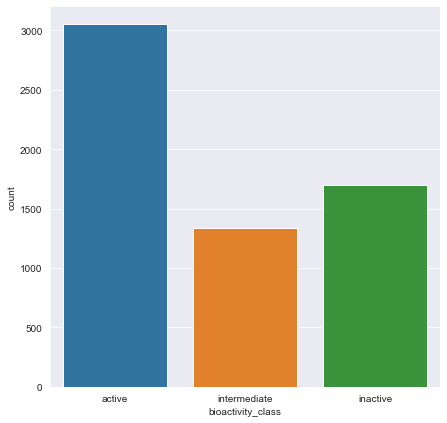

In [25]:
plt.figure(figsize = (7, 7))
graph = sns.countplot(x = df4['bioactivity_class'])
graph.set_xticklabels(graph.get_xticklabels())

# Save the image as png
plt.savefig('CHEMBL230_bioactivity_class_plot.png')

plt.show()

In [26]:
df5 = df4.dropna()
df5

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,60.00
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,intermediate,3230.00
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,80.00
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,0.12
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,100000.00
...,...,...,...,...
6074,CHEMBL4637729,O=[N+]([O-])c1ccc(-n2c(-c3ccc(Br)cc3)nc3ccccc3...,inactive,102000.00
6075,CHEMBL4644152,O=[N+]([O-])c1ccc(-n2c(-c3ccccc3)nc3ccccc32)cc1,inactive,162000.00
6076,CHEMBL4644109,Nc1ccc(-n2c(-c3ccc(Cl)cc3)nc3ccccc32)cc1,inactive,193000.00
6077,CHEMBL4640459,Nc1ccc(-c2nc3ccccc3n2-c2ccc(N)cc2)cc1,inactive,173000.00


### Physicochemical Parameters

Here, we will perform descriptor calculation and exploratory data analysis.

First, we begin by calculating the Lipinski decriptors.

Christopher Lipinski, is the author of a set of rule-of-thumb for evaluating the **druglinkiness** of compounds. Such druglikiness is based on the *adsorption*, *distribution*, *metabolism*, and *excretion* **`ADME`**. The ADME is also known as the pharmacokinetic profile of the drug. 
Lipinski analysed all orally active FDA-approved drugs in the formulation of what is known as the Lipinski's **Rule-of-Five**.

They are:
* molecular weight < 500 Dalton
* Octanol-water partition coeffient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

Let us define a custom function to calculate descriptors. This custom function was adapted from the youtube channel, course title: 'Python for Bioinformatics - Drug Discovery Using Machine Learning and Data Analysis', developed by Chanin Nantasenamat.

In [27]:
# Inspired by: https://codeocean.com/explore/capsule?query=tag:data-curation


def lipinski(smiles, verbose = False):
    
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)
        
    baseData = np.arange(1,1)
    i = 0
    for mol in moldata:
        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        
        row = np.array([desc_MolWt,
                       desc_MolLogP,
                       desc_NumHDonors,
                       desc_NumHAcceptors])
        
        
        if(i==0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i+1
            
    columnNames = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
    descriptors = pd.DataFrame(data = baseData, columns = columnNames)
        
    return descriptors

In [28]:
df_lipinski = lipinski(df5.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.406,3.85622,0.0,3.0
1,357.406,3.80782,0.0,4.0
2,469.965,6.22772,0.0,4.0
3,335.397,6.38170,1.0,0.0
4,343.423,4.24930,0.0,3.0
...,...,...,...,...
6073,394.228,5.36320,0.0,4.0
6074,315.332,4.60070,0.0,4.0
6075,319.795,4.92810,1.0,3.0
6076,300.365,3.85690,2.0,4.0


In [29]:
df_lipinski.describe()

,MW,LogP,NumHDonors,NumHAcceptors
count,6078.000000,6078.000000,6078.000000,6078.000000
mean,387.259695,3.873095,1.003455,4.672754
std,113.379981,1.531074,1.634484,2.840216
min,108.144000,-11.954000,0.000000,0.000000
25%,336.409750,3.109650,0.000000,3.000000
50%,381.379000,3.866250,1.000000,4.000000
75%,420.461000,4.615000,1.000000,5.000000
max,2324.383000,13.313000,31.000000,57.000000


In [30]:
df_combined = pd.concat([df5, df_lipinski], axis = 1)
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,60.00,311.406,3.85622,0.0,3.0
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,intermediate,3230.00,357.406,3.80782,0.0,4.0
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,80.00,469.965,6.22772,0.0,4.0
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,0.12,335.397,6.38170,1.0,0.0
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,100000.00,343.423,4.24930,0.0,3.0
...,...,...,...,...,...,...,...,...
6074,CHEMBL4637729,O=[N+]([O-])c1ccc(-n2c(-c3ccc(Br)cc3)nc3ccccc3...,inactive,102000.00,315.332,4.60070,0.0,4.0
6075,CHEMBL4644152,O=[N+]([O-])c1ccc(-n2c(-c3ccccc3)nc3ccccc32)cc1,inactive,162000.00,319.795,4.92810,1.0,3.0
6076,CHEMBL4644109,Nc1ccc(-n2c(-c3ccc(Cl)cc3)nc3ccccc32)cc1,inactive,193000.00,300.365,3.85690,2.0,4.0
6077,CHEMBL4640459,Nc1ccc(-c2nc3ccccc3n2-c2ccc(N)cc2)cc1,inactive,173000.00,475.510,7.35780,2.0,2.0


### Convert $IC_{50}$ to $pIC_{50}$

To allow $IC_{50}$ data to be more uniformly distributed, we will convert $IC_{50}$ to the negative logarithmic scale which is essentially -log10$(IC_{50})$.

The following custom function: $pIC_{50}(Arg = input)$ will accept a DataFrame as input and will:
* Take the IC50 values from the standard_value column and then convert it from nanomolar (nM) to molar (M) values by multiplying the value by $10^{-9}$
* Take the molar value and apply the -log10
* Delete the standard_value column and create a new $pIC_{50}$ column

In [31]:
def pIC50(input):
    pIC50 = []
    
    for i in input['standard_value_norm']:
        molar = i * (10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))
        
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
    
    return x

In [32]:
df_combined.standard_value.describe()

count    6.078000e+03
mean     1.162967e+06
std      2.082539e+07
min      0.000000e+00
25%      1.000000e+02
50%      1.000000e+03
75%      1.000000e+04
max      8.333357e+08
Name: standard_value, dtype: float64

Note that values greater than 100,000,000 will be fixed at 100,000,000, otherwise the negative logarithmic value will become negative.

In [33]:
-np.log10((10**-9) * 100000000)

1.0

In [34]:
-np.log10((10**-9) * 10000000000)

-1.0

In [35]:
def norm_value(input):
    norm = []
    
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
        
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
    
    
    return x

In [36]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,311.406,3.85622,0.0,3.0,60.00
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,intermediate,357.406,3.80782,0.0,4.0,3230.00
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,469.965,6.22772,0.0,4.0,80.00
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,0.12
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,100000.00
...,...,...,...,...,...,...,...,...
6074,CHEMBL4637729,O=[N+]([O-])c1ccc(-n2c(-c3ccc(Br)cc3)nc3ccccc3...,inactive,315.332,4.60070,0.0,4.0,102000.00
6075,CHEMBL4644152,O=[N+]([O-])c1ccc(-n2c(-c3ccccc3)nc3ccccc32)cc1,inactive,319.795,4.92810,1.0,3.0,162000.00
6076,CHEMBL4644109,Nc1ccc(-n2c(-c3ccc(Cl)cc3)nc3ccccc32)cc1,inactive,300.365,3.85690,2.0,4.0,193000.00
6077,CHEMBL4640459,Nc1ccc(-c2nc3ccccc3n2-c2ccc(N)cc2)cc1,inactive,475.510,7.35780,2.0,2.0,173000.00


In [37]:
df_norm.standard_value_norm.describe()

count    6.078000e+03
mean     5.415631e+05
std      6.187222e+06
min      0.000000e+00
25%      1.000000e+02
50%      1.000000e+03
75%      1.000000e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [38]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,311.406,3.85622,0.0,3.0,7.221849
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,intermediate,357.406,3.80782,0.0,4.0,5.490797
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,469.965,6.22772,0.0,4.0,7.096910
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,9.920819
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
6074,CHEMBL4637729,O=[N+]([O-])c1ccc(-n2c(-c3ccc(Br)cc3)nc3ccccc3...,inactive,315.332,4.60070,0.0,4.0,3.991400
6075,CHEMBL4644152,O=[N+]([O-])c1ccc(-n2c(-c3ccccc3)nc3ccccc32)cc1,inactive,319.795,4.92810,1.0,3.0,3.790485
6076,CHEMBL4644109,Nc1ccc(-n2c(-c3ccc(Cl)cc3)nc3ccccc32)cc1,inactive,300.365,3.85690,2.0,4.0,3.714443
6077,CHEMBL4640459,Nc1ccc(-c2nc3ccccc3n2-c2ccc(N)cc2)cc1,inactive,475.510,7.35780,2.0,2.0,3.761954


### Search and remove 'intermediate' bioactivity class

Here, we will attempt to remove the intermediate class from the dataset.

In [39]:
df_cleaned = df_final[df_final.bioactivity_class != 'intermediate']
df_cleaned

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,311.406,3.85622,0.0,3.0,7.221849
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,469.965,6.22772,0.0,4.0,7.096910
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,9.920819
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,4.000000
6,CHEMBL288773,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1Cc1ccc(F)cc1,inactive,343.423,4.05442,0.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
6074,CHEMBL4637729,O=[N+]([O-])c1ccc(-n2c(-c3ccc(Br)cc3)nc3ccccc3...,inactive,315.332,4.60070,0.0,4.0,3.991400
6075,CHEMBL4644152,O=[N+]([O-])c1ccc(-n2c(-c3ccccc3)nc3ccccc32)cc1,inactive,319.795,4.92810,1.0,3.0,3.790485
6076,CHEMBL4644109,Nc1ccc(-n2c(-c3ccc(Cl)cc3)nc3ccccc32)cc1,inactive,300.365,3.85690,2.0,4.0,3.714443
6077,CHEMBL4640459,Nc1ccc(-c2nc3ccccc3n2-c2ccc(N)cc2)cc1,inactive,475.510,7.35780,2.0,2.0,3.761954


In [40]:
df_cleaned.to_csv('CHEMBL230_bioactivity_data_pIC50.csv', index = False)

### Exploratory Data Analysis (Chemical Space Analysis) via Lipinski Descriptors

In [41]:
dataset = pd.read_csv('CHEMBL230_bioactivity_data_pIC50.csv')
dataset

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,311.406,3.85622,0.0,3.0,7.221849
1,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,469.965,6.22772,0.0,4.0,7.096910
2,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,9.920819
3,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,4.000000
4,CHEMBL288773,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1Cc1ccc(F)cc1,inactive,343.423,4.05442,0.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
4740,CHEMBL4637729,O=[N+]([O-])c1ccc(-n2c(-c3ccc(Br)cc3)nc3ccccc3...,inactive,315.332,4.60070,0.0,4.0,3.991400
4741,CHEMBL4644152,O=[N+]([O-])c1ccc(-n2c(-c3ccccc3)nc3ccccc32)cc1,inactive,319.795,4.92810,1.0,3.0,3.790485
4742,CHEMBL4644109,Nc1ccc(-n2c(-c3ccc(Cl)cc3)nc3ccccc32)cc1,inactive,300.365,3.85690,2.0,4.0,3.714443
4743,CHEMBL4640459,Nc1ccc(-c2nc3ccccc3n2-c2ccc(N)cc2)cc1,inactive,475.510,7.35780,2.0,2.0,3.761954


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'ticks')

* Frequency plot of bioactivity class

In [43]:
#plt.figure(figsize = (7, 7))

#sns.countplot(x = 'bioactivity_class', data = dataset, edgecolor = 'red')

#plt.xlabel('Bioactivity Class', fontsize = 14, fontweight = 'bold')
#plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')

# Save the image as png
#plt.savefig('CHEMBL230_bioactivity_class_plotII.png')
#plt.show()

Bioactivity class has a fair distribution. 

### Physicochemical Parameter Relationships

* ####  Scatter plot for MW (molecular weight) versus LogP

In [44]:
#plt.figure(figsize = (5.5, 5.5))

#sns.scatterplot(x = 'MW', y = 'LogP', data = dataset, hue = 'bioactivity_class', size = 'pIC50', edgecolor = 'brown', alpha = 0.7)

#plt.xlabel('MW', fontsize = 14, fontweight = 'bold')
#plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')
#plt.legend(bbox_to_anchor = (0.6, 1), loc = 'best', borderaxespad = 0)

#plt.savefig('plot_MW_vs_LogP.png')
#plt.show()

* **Scatter plot for MW vs NumHDonors**

In [45]:
#plt.figure(figsize = (5.5, 5.5))

#sns.scatterplot(x = 'MW', y = 'NumHDonors', data = dataset, hue = 'bioactivity_class', size = 'pIC50', edgecolor = 'brown', alpha = 0.7)

#plt.xlabel('MW', fontsize = 14, fontweight = 'bold')
#plt.ylabel('NumHDonors', fontsize = 14, fontweight = 'bold')
#plt.legend(bbox_to_anchor = (0.6, 1), loc = 'best', borderaxespad = 0)

#plt.savefig('plot_MW_vs_NumHDonors.png')
#plt.show()

* **Scatter plot for MW vs NumHAcceptors**

In [46]:
#plt.figure(figsize = (5.5, 5.5))

#sns.scatterplot(x = 'MW', y = 'NumHAcceptors', data = dataset, hue = 'bioactivity_class', size = 'pIC50', edgecolor = 'brown', alpha = 0.7)

#plt.xlabel('MW', fontsize = 14, fontweight = 'bold')
#plt.ylabel('NumHAcceptors', fontsize = 14, fontweight = 'bold')
#plt.legend(bbox_to_anchor = (0.6, 1), loc = 'best', borderaxespad = 0)

#plt.savefig('plot_MW_vs_NumHAcceptors.png')
#plt.show()

* **Scatter plot for LogP vs NumHAcceptors**

In [47]:
#plt.figure(figsize = (5.5, 5.5))

#sns.scatterplot(x = 'LogP', y = 'NumHAcceptors', data = dataset, hue = 'bioactivity_class', size = 'pIC50', edgecolor = 'brown', alpha = 0.7)

#plt.xlabel('LogP', fontsize = 14, fontweight = 'bold')
#plt.ylabel('NumHAcceptors', fontsize = 14, fontweight = 'bold')
#plt.legend(bbox_to_anchor = (0.6, 1), loc = 'best', borderaxespad = 0)

#plt.savefig('plot_Log_vs_NumHAcceptors.png')
#plt.show()

* **Scatter plot for LogP vs NumHDonors**

In [48]:
#plt.figure(figsize = (5.5, 5.5))

#sns.scatterplot(x = 'LogP', y = 'NumHDonors', data = dataset, hue = 'bioactivity_class', size = 'pIC50', edgecolor = 'brown', alpha = 0.7)

#plt.xlabel('LogP', fontsize = 14, fontweight = 'bold')
#plt.ylabel('NumHDonors', fontsize = 14, fontweight = 'bold')
#plt.legend(bbox_to_anchor = (0.6, 1), loc = 'best', borderaxespad = 0)

#plt.savefig('plot_LogP_vs_NumHDonors.png')
#plt.show()

* **Scatter plot for NumHAcceptors vs NumHDonors**

In [49]:
#plt.figure(figsize = (5.5, 5.5))

#sns.scatterplot(x = 'NumHAcceptors', y = 'NumHDonors', data = dataset, hue = 'bioactivity_class', size = 'pIC50', edgecolor = 'brown', alpha = 0.7)

#plt.xlabel('NumHAcceptors', fontsize = 14, fontweight = 'bold')
#plt.ylabel('NumHDonors', fontsize = 14, fontweight = 'bold')
#plt.legend(bbox_to_anchor = (0.6, 1), loc = 'best', borderaxespad = 0)

#plt.savefig('plot_NumHAcceptors_vs_NumHDonors.png')
#plt.show()

### Statistical Analysis: The Mann-Whitney-U Test

In [50]:
# https://machinelearningmastery.com/nonparameteric-statistical-significance-tests-in-python/

def mannwhitney(descriptor, verbose = False):
    
    from numpy.random import seed 
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    
    
# seed the random number generator
    seed(1)
    
# actives and inactives
    selection = [descriptor, 'bioactivity_class']
    df = dataset[selection]
    active = df[df.bioactivity_class == 'active']
    active = active[descriptor]
    
    selection = [descriptor, 'bioactivity_class']
    df = dataset[selection]
    inactive = df[df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]
    
# compare samples
    stat, p = mannwhitneyu(active, inactive)
    #print('Statistics = %, 3%, p = %' % (stat, p))
    
# interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same Distribution (accept the null hypothesis, H0)'
    else:
        interpretation = 'Different Distribution (reject the null hypothesis)'
    
    results = pd.DataFrame({'Descriptor' : descriptor,
                           'Statistics' : stat,
                           'p-value' : p,
                           'alpha-value' : alpha,
                           'Interpretation' : interpretation},
                           index = [0])
   

    filename = 'CHEMBL230' + 'mannwhitneyu_' + descriptor +'.csv'
    
    results.to_csv(filename)
    
    return results   
    

* **pIC50**

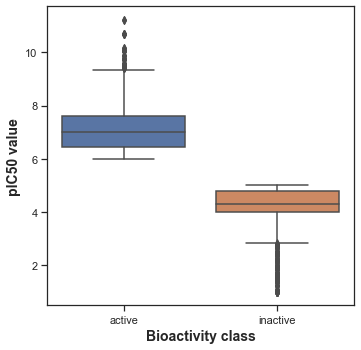

In [51]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = dataset)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('pIC50 value', fontsize = 14, fontweight = 'bold')

plt.savefig('Boxplot_pIC50.png')
plt.show()

In [52]:
mannwhitney('pIC50')

,Descriptor,Statistics,p-value,alpha-value,Interpretation
0,pIC50,0.0,0.0,0.05,Different Distribution (reject the null hypoth...


**`Mann_Whitney U Test`** compares the statisitical significance in terms of the pIC50 variable between the active class and inactive class. Based on this analysis, the `p-value` is less than `0.05 (the alpha value)`, and therefore we reject the null hypothesis, which is the pIC50 variable have a different distribution.

* **MW**

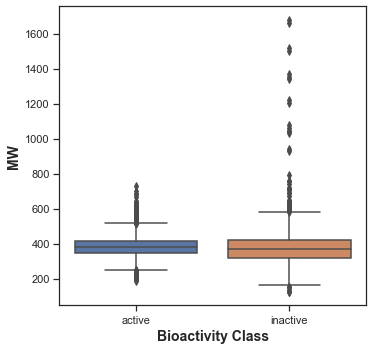

In [53]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = dataset)

plt.xlabel('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('MW', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_MW.png')
plt.show()

In [54]:
mannwhitney('MW')

,Descriptor,Statistics,p-value,alpha-value,Interpretation
0,MW,2289772.5,3.432966e-11,0.05,Different Distribution (reject the null hypoth...


* **LogP**

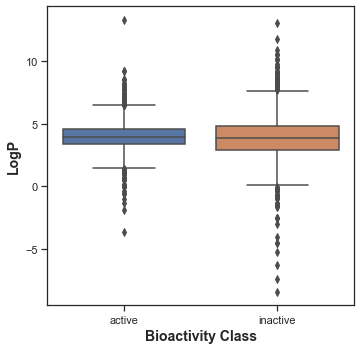

In [55]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = dataset)

plt.xlabel('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_LogP.png')
plt.show()

In [56]:
mannwhitney('LogP')

,Descriptor,Statistics,p-value,alpha-value,Interpretation
0,LogP,2438822.0,0.000626,0.05,Different Distribution (reject the null hypoth...


* **NumHDonors**

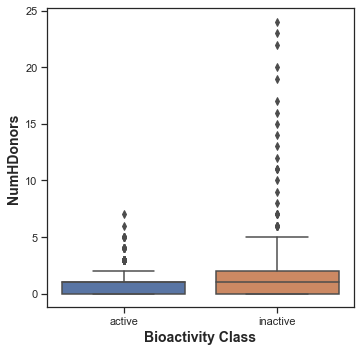

In [57]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = dataset)

plt.xlabel('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('NumHDonors', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_NumHDonors.png')
plt.show()

In [58]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p-value,alpha-value,Interpretation
0,NumHDonors,2233396.5,2.935813e-17,0.05,Different Distribution (reject the null hypoth...


* **NumHAcceptors**

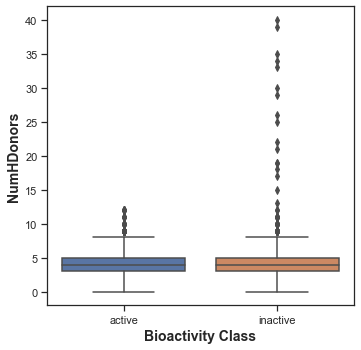

In [59]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = dataset)

plt.xlabel('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('NumHDonors', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_NumHAcceptors.png')
plt.show()

In [60]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p-value,alpha-value,Interpretation
0,NumHAcceptors,2564255.5,0.322321,0.05,"Same Distribution (accept the null hypothesis,..."


**Interpretation of Statistiacal Results**

**`Box PLot`**

The Box plots are a useful way to visualize differences among different samples or groups. They manage to provide a lot of statistical information, including medians, ranges, and outliers.

**pIC50 Values**

Taking a look at the pIC50 values, the **active** and **inactives** displayed **statistically significant difference**, which is to be expected since the threshold values (IC50 < 1000 nM = Active, IC50 > 10000 nM = Inactive; corresponding to median pIC50 value of about 6.5 = Active, median pIC50 value of 4.3 = Inactives) were used to define the active and inacitve classes.

**Lipinski's Descriptors**

Three of the four Lipinsky descriptors (MW, LogP, NumHDonors) exhibited some **differences** between the **actives** and **inactives**, hence the **statistical significance difference** between **actives** and **inactives**. But, NumHAcceptors did not follow the same trend as the others. It has **the same distribution**.

### Descriptor Calculation and Dataset Preparation

Here, molecular descriptor calculations are performed. This step is an essentially quantitative description of compounds in the dataset. Next, the calculated descriptors are confined to form a dataset from which a model is built for the machine to learn.

The **PaDEL-Descriptor software**, and **microsoft excel** where used to preprocess the dataset. 

* **Data Preparation**

In [61]:
selection = ['canonical_smiles', 'molecule_chembl_id']
data_selection = dataset[selection]
data_selection.to_csv('CHEMBL230_molecule.smi', sep = '\t', index = False, header = False)

In [62]:
cm_data = pd.read_csv('CHEMBL230_molecule.smi.')
cm_data.head(4)

,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1\tCHEMBL297008
0,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...
1,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1...
2,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1\t...
3,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1Cc1ccc(F)cc1\tC...


In [63]:
cm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 1 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1	CHEMBL297008  4743 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


The code above is used to prepare the dataset into a PADEL readable format, the 'smi'. The PADEL software was then used to calculate molecular fingerprints and descriptors. More task to prepare the file into a 'csv' format was done in Excel.

* Data Engineering

Here, we want to remove intersecting rows between the descriptor_fingerprints data and the pIC50 data and arrive at tailored dataset for training and test.

In [64]:
df1 = pd.read_csv('CHEMBL230_Descriptor.csv')
len(df1)

4467

In [65]:
df2 = pd.read_csv('CHEMBL230_bioactivity_data_pIC50.csv')
len(df2)

4745

Obviously they are not of the same low length.

In [66]:
intersecting_rows = set(df1.index).intersection(df2.index)
df2 = df2.drop(intersecting_rows, axis = 0)


print(len(df2))

df2

278


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
4467,NaN,NaN,NaN,367.352,3.35660,0.0,5.0,NaN
4468,CHEMBL109017,Cc1csc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=O)cc2)n1,active,314.366,2.96442,1.0,4.0,6.958607
4469,CHEMBL865,Cc1onc(-c2ccccc2)c1-c1ccc(S(N)(=O)=O)cc1,active,443.952,6.34010,0.0,4.0,8.301030
4470,CHEMBL277115,CS(=O)(=O)c1ccc(-c2sc(-c3ccccc3Cl)nc2-c2ccc(F)...,active,354.456,4.13330,0.0,5.0,7.301030
4471,CHEMBL146742,CS(=O)(=O)c1ccc(-c2c(-c3ccccc3)nc3sccn23)cc1,active,358.850,4.17592,0.0,4.0,7.795880
...,...,...,...,...,...,...,...,...
4740,CHEMBL4637729,O=[N+]([O-])c1ccc(-n2c(-c3ccc(Br)cc3)nc3ccccc3...,inactive,315.332,4.60070,0.0,4.0,3.991400
4741,CHEMBL4644152,O=[N+]([O-])c1ccc(-n2c(-c3ccccc3)nc3ccccc32)cc1,inactive,319.795,4.92810,1.0,3.0,3.790485
4742,CHEMBL4644109,Nc1ccc(-n2c(-c3ccc(Cl)cc3)nc3ccccc32)cc1,inactive,300.365,3.85690,2.0,4.0,3.714443
4743,CHEMBL4640459,Nc1ccc(-c2nc3ccccc3n2-c2ccc(N)cc2)cc1,inactive,475.510,7.35780,2.0,2.0,3.761954


In [67]:
cleaned_pIC50 = pd.read_csv('CHEMBL230_bioactivity_data_pIC50.csv')
cleaned_pIC50.drop(cleaned_pIC50.index[4467:4745], axis = 0, inplace = True)

cleaned_pIC50

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,311.406,3.85622,0.0,3.0,7.221849
1,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,469.965,6.22772,0.0,4.0,7.096910
2,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,9.920819
3,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,4.000000
4,CHEMBL288773,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1Cc1ccc(F)cc1,inactive,343.423,4.05442,0.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
4462,CHEMBL89429,CS(=O)(=O)c1ccc(C2=CC3(C=C2c2ccc(F)cc2)CC3)cc1,active,340.419,4.49000,0.0,2.0,7.585027
4463,CHEMBL4533150,CS(=O)(=O)c1ccc(C2=C(c3ccc(F)cc3)Cc3ccccc32)cc1,active,364.441,4.74440,0.0,2.0,7.958607
4464,CHEMBL4473838,CS(=O)(=O)c1ccc(-c2c(-c3ccc(F)cc3)oc3ccccc23)cc1,active,366.413,5.30940,0.0,3.0,7.698970
4465,CHEMBL328837,CS(=O)(=O)c1ccc(-c2csc(Br)c2-c2ccc(F)cc2)cc1,active,411.317,5.38720,0.0,3.0,7.096910


In [68]:
cleaned_pIC50.to_csv('CHEMBL230_cleaned_pIC50.csv', index = False)

## Machine Learning

* Load Datasets

In [69]:
train_dataset = pd.read_csv('CHEMBL230TRAIN.csv')
test_dataset = pd.read_csv('CHEMBL230TEST.csv')

In [70]:
train_dataset.head(3)

,bioactivity_class,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,active,CHEMBL297008,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,active,CHEMBL43736,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,active,CHEMBL140167,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
test_dataset.head(3)

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL66552,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1814711,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1814712,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
train_dataset.describe()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
count,3099.000000,3099.000000,3099.000000,3099.000000,3099.0,3099.0,3099.0,3099.0,3099.0,3099.0,...,3099.0,3099.0,3099.0,3099.0,3099.0,3099.0,3099.0,3099.0,3099.0,3099.0
mean,0.975799,0.966763,0.469184,0.009681,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.153699,0.179283,0.499130,0.097928,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
train_dataset.info()
train_dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Columns: 883 entries, bioactivity_class to PubchemFP880
dtypes: int64(881), object(2)
memory usage: 20.9+ MB


(3099, 883)

* Frequency distribution of bioactivity class for train dataset

In [74]:
test_dataset.info()
test_dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Columns: 882 entries, Name to PubchemFP880
dtypes: int64(881), object(1)
memory usage: 9.2+ MB


(1368, 882)

In [75]:
test_dataset.describe()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,...,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0
mean,0.951754,0.936404,0.548977,0.023392,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.214363,0.244122,0.497777,0.151200,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* **Data Cleaning: Correcting, Completing, Creating, and Converting**

Recall, preprocessing and detailed cleaning of the dataset at initial stages have adequately eradicated any presence of a NAN value in the dataset. As a double check, let us do the following:

In [76]:
train_dataset.isna().sum().sum(), test_dataset.isna().sum().sum()

(0, 0)

No NAN value in the dataset. Let's proceed further to prepare the dataset for modeling.

* Recreating the train_dataset

In [77]:
train_dataset['bioactivity_class'] = train_dataset['bioactivity_class'].map({'active' : 1,
                                                                      'inactive' : 0})

train_dataset.head(3)

,bioactivity_class,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,CHEMBL297008,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,CHEMBL43736,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,CHEMBL140167,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Drop/delete 'Name' column in both train_dataset and test_dataset

In [78]:
del train_dataset['Name']
train_dataset.head(3)

,bioactivity_class,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
del test_dataset['Name']
test_dataset.head(3)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Getting Input and Target Columns

In [80]:
train_data = train_dataset.copy()
test_data = test_dataset.copy()

input_cols = train_data.columns[1:3499]
target_col = train_data.columns[0]

target_col

'bioactivity_class'

* **Distribution of Target Label**

In [81]:
train_data['bioactivity_class'].value_counts()

1    2199
0     900
Name: bioactivity_class, dtype: int64

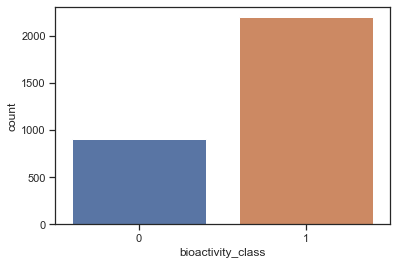

In [82]:
graph = sns.countplot(x = train_data['bioactivity_class'])
graph.set_xticklabels(graph.get_xticklabels())
plt.savefig('CHEMBLE230_train_bioactivity_class.png')
plt.show()

In [83]:
inputs = train_data[input_cols].copy()
targets = train_data[target_col].copy()
test_inputs = test_data[input_cols].copy()

In [84]:
numeric_cols = inputs.select_dtypes(include = ['int64', 'float64']).columns.tolist()

### Scale Numeric Values

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

* Let us extract all numeric columns (as inputs) for training

In [87]:
X = inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

## Machine Learning Models

Let us test several machine learning models for selection and initialization.

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size = 0.2, random_state = 42)

In [90]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #Tree-based-ensemble
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 5,
                                        test_size = 0.2,
                                        train_size = 0.8,
                                        random_state = 42)

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy (STD)' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = train_data['bioactivity_class']

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_train, y_train,
                                                cv  = cv_split, 
                                                return_train_score = True,
                                                return_estimator = True)
    

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean() 
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()  
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy (STD)'] = cv_results['test_score'].std()   #let's know the worst that can happen!
    

    #save MLA predictions
    alg.fit(inputs[numeric_cols], train_data['bioactivity_class'])
    MLA_predict[MLA_name] = alg.predict(inputs[numeric_cols])
    
    row_index += 1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy (STD),MLA Time
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.96591,0.858871,0.01319,1.560078
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.981947,0.856452,0.010924,0.888185
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.981947,0.853226,0.016399,1.137435
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.978013,0.84879,0.014426,5.863113
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.975593,0.840726,0.016028,0.708396
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.879879,0.828226,0.008105,0.023589
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.862532,0.822581,0.008742,2.430045
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.981947,0.821774,0.016993,0.110716
19,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.904589,0.821371,0.028041,1.006095
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.867574,0.819758,0.019861,0.928933


In [91]:
MLA_compare.to_csv('CHEMBL230_MLA_compare.csv')

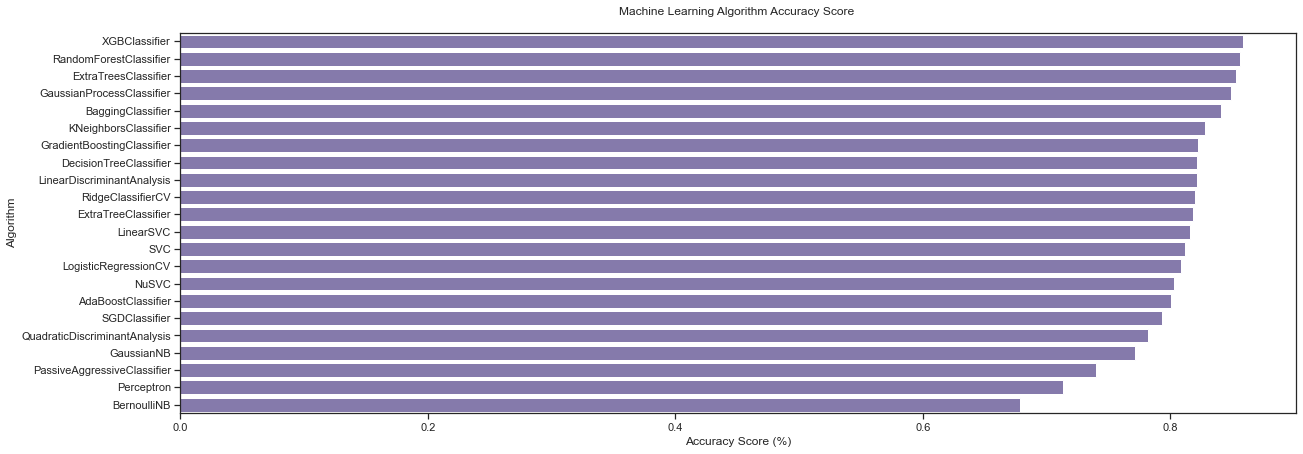

In [92]:
plt.figure(figsize = (20, 7))
sns.barplot(x = 'MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

plt.savefig('Machine_Learning_Algorithms_Accuracy Score.png')
plt.show()

Let us further round-off the decision of choosing a model out of the top six. We check the selected models for an algorithm that would best predict the activity of the molecule by applying the **`cross_validation_score`** strategy, with a 10-fold cross validation set.

The top 6 ML models are RandomForestClassifier, ExtraTreesClassifier, GaussianProcessClassifier, BaggingClassifier, XGBClassifier, and KNeighborsClassifier. We do this check to get a more realistic result by testing the performance averaging the results.

Cross validation ensures that the following result is not arbitary and gives a more reliable performance check.

In [93]:
from sklearn.model_selection import cross_val_score
cv = 10

In [94]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [95]:
rfc = RandomForestClassifier()
scores_rfc = cross_val_score(rfc, X_train, y_train, cv = cv, scoring = 'accuracy')
mean_rfc = scores_rfc.mean() * 100
stan_dev_rfc = scores_rfc.std()

etc = ExtraTreesClassifier()
scores_etc = cross_val_score(etc, X_train, y_train, cv = cv, scoring = 'accuracy')
mean_etc = scores_etc.mean() * 100
stan_dev_etc = scores_etc.std()

gpc = GaussianProcessClassifier()
scores_gpc = cross_val_score(gpc, X_train, y_train, cv = cv, scoring = 'accuracy')
mean_gpc = scores_gpc.mean() * 100
stan_dev_gpc = scores_gpc.std()

bc = BaggingClassifier()
scores_bc = cross_val_score(bc, X_train, y_train, cv = cv, scoring = 'accuracy')
mean_bc = scores_bc.mean() * 100
stan_dev_bc = scores_bc.std()

xgb = XGBClassifier()
scores_xgb = cross_val_score(xgb, X_train, y_train, cv = cv, scoring = 'accuracy')
mean_xgb = scores_xgb.mean() * 100
stan_dev_xgb = scores_xgb.std()

knc = KNeighborsClassifier()
scores_knc = cross_val_score(knc, X_train, y_train, cv = cv, scoring = 'accuracy')
mean_knc = scores_knc.mean() * 100
stan_dev_knc = scores_knc.std()

* Summary Table

In [96]:
CV_Result = pd.DataFrame({
    'Model' : ['RandomForestClassifier', 'ExtraTreesClassifier',
               'GaussianProcessClassifier', 'BaggingClassifier',
               '*XGBClassifier', 'KNeighborsClassifier'],
    'Score' : [scores_rfc, scores_etc, scores_gpc,
              scores_bc, scores_xgb, scores_knc],
    'Percentage_Mean_Score' : [mean_rfc, mean_etc, mean_gpc,
                              mean_bc, mean_xgb, mean_knc],
    'Standard_Deviation' : [stan_dev_rfc, stan_dev_etc, stan_dev_gpc,
                           stan_dev_bc, stan_dev_xgb, stan_dev_knc]})

CV_Result_df = CV_Result.sort_values(by = 'Percentage_Mean_Score', ascending = False)

In [97]:
CV_Result = CV_Result.set_index('Model')
CV_Result

,Score,Percentage_Mean_Score,Standard_Deviation
Model,,,
RandomForestClassifier,"[0.8669354838709677, 0.842741935483871, 0.8830...",86.809129,0.015418
ExtraTreesClassifier,"[0.8588709677419355, 0.8387096774193549, 0.883...",86.486385,0.015651
GaussianProcessClassifier,"[0.8588709677419355, 0.8306451612903226, 0.887...",86.244286,0.021229
BaggingClassifier,"[0.8306451612903226, 0.8629032258064516, 0.858...",85.639611,0.019835
*XGBClassifier,"[0.875, 0.8629032258064516, 0.8790322580645161...",86.970419,0.017590
KNeighborsClassifier,"[0.842741935483871, 0.8548387096774194, 0.8669...",83.702821,0.015563


In [98]:
CV_Result.to_csv('CV_Result.csv', index = True)

* **ROC and Precision-Recall Curves**

In [99]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

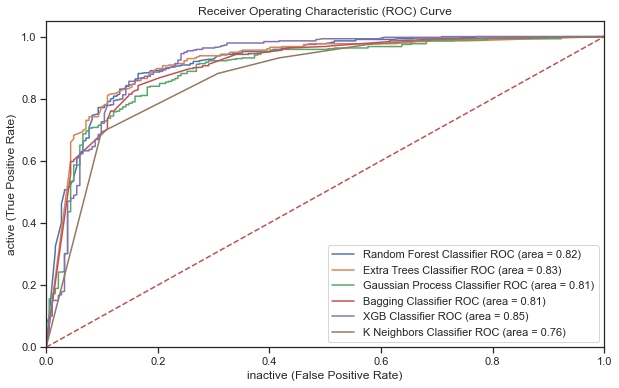

In [100]:
plt.figure(figsize = (10, 6))

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(),
},
{
    'label': 'Extra Trees Classifier',
    'model': ExtraTreesClassifier(),
},
{
    'label': 'Gaussian Process Classifier',
    'model': GaussianProcessClassifier(),
},
{
    'label': 'Bagging Classifier',
    'model': BaggingClassifier(),
},
{
    'label': 'XGB Classifier',
    'model': XGBClassifier(),
},
{
    'label': 'K Neighbors Classifier',
    'model': KNeighborsClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred = model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])  
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('inactive (False Positive Rate)')
plt.ylabel('active (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = "lower right")
plt.savefig('CHEMBL230_ROC_curve.png')
plt.show()   # Display

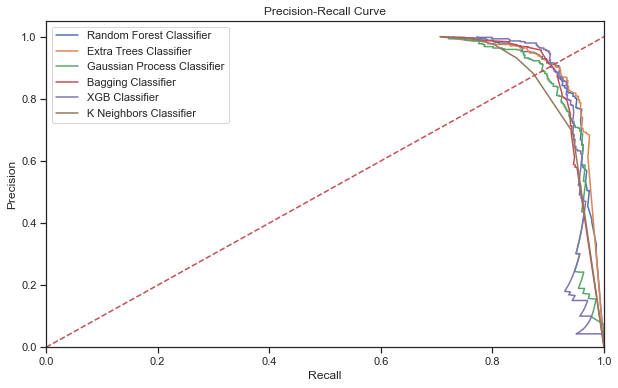

In [101]:
plt.figure(figsize = (10, 6))

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(),
},
{
    'label': 'Extra Trees Classifier',
    'model': ExtraTreesClassifier(),
},
{
    'label': 'Gaussian Process Classifier',
    'model': GaussianProcessClassifier(),
},
{
    'label': 'Bagging Classifier',
    'model': BaggingClassifier(),
},
{
    'label': 'XGB Classifier',
    'model': XGBClassifier(),
},
{
    'label': 'K Neighbors Classifier',
    'model': KNeighborsClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred = model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1], pos_label = model.classes_[1])
# Calculate auc of precision and recall on the plots
    
# Now, plot the computed values
    plt.plot(precision, recall, label = (m['label']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc = "upper left")
plt.show()   # Display

![](https://miro.medium.com/max/3840/1*_MBY_b7gRa-7m121eX5_FA.png)


**Types of machine learning tasks**

* Supervised learning
* Unsupervised learning
* Reinforcement learning


*Supervised learning*

Supervised learning is so named because the human being acts as a guide to teach the algorithm what conclusions it should come up with. Supervised learning requires that the algorithm’s possible outputs are already known and that the data used to train the algorithm is already labeled with correct answers. If the output is a real number, we call the task regression. If the output is from the limited number of values, where these values are unordered, then it’s classification.

XGBoost stands for Extreme Gradient Boosting; it is a specific implementation of the Gradient Boosting method which uses more accurate approximations to find the best tree model. It employs a number of nifty tricks that make it exceptionally successful, particularly with structured data. The most important are:

1.) computing second-order gradients, i.e. second partial derivatives of the loss function (similar to Newton’s method), which provides more information about the direction of gradients and how to get to the minimum of our loss function. While regular gradient boosting uses the loss function of our base model (e.g. decision tree) as a proxy for minimizing the error of the overall model, XGBoost uses the 2nd order derivative as an approximation.

2.) And advanced regularization (L1 & L2), which improves model generalization.

XGBoost has additional advantages: training is very fast and can be parallelized / distributed across clusters.

### Dimensionality Reduction

This is a high dimension dataset. Let us reduce the dimensions using the 'PCA' and 't-SNE' modules from sklearn. 

Linear dimensionality reduction using Singular Value Decomposition (SVD) of the data project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD. PCA reduces the number of dimensions to an optimum number if the number of features is very high. This will suppress noise in the dataset and speed up the computation of pairwise distances between samples.

n observations with p features can be interpreted as n points in a p-dimensional space. PCA aims to project this space into a q-dimensional subspace (with q<p) with as little information loss as possible.
It does so by finding the q directions in which the n points vary the most (the principal components). It then projects the original data points into the q-dimensional subspace. PCA returns a n x q dimensional matrix.

Using PCA on our data will decrease the number of during training and testing.

t-distributed Stochastic Neighbor Embedding (t-SNE) is a tool to visualize high-dimensional data in one, two, or three dimensions. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

The t-SNE is a type of manifold learning technique. Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Scikit-learn provides many algorithms for manifold learning: https://scikit-learn.org/stable/modules/manifold.html 

Here's a visual representation of t-SNE applied to visualize 2 dimensional data in 1 dimension:

<img src="https://i.imgur.com/rVMAaix.png" width="360">



Here's a video explaning how t-SNE works: https://www.youtube.com/watch?v=NEaUSP4YerM

In [102]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [103]:
train_data = train_dataset.copy()

scaled_data = MinMaxScaler().fit_transform(train_data)
train_data = pd.DataFrame(scaled_data, columns = train_data.columns)

Let us look at the cummulative variance with respect to the number of components.

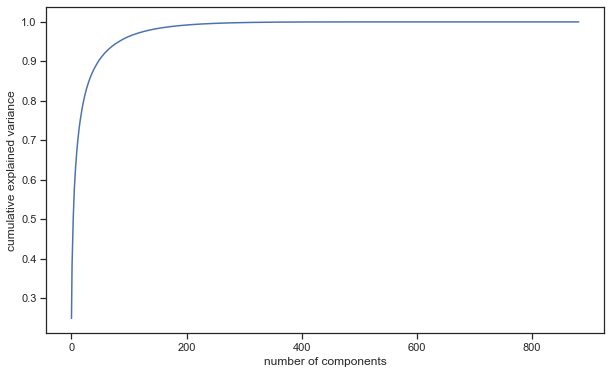

In [104]:
plt.figure(figsize = (10, 6))

pca = PCA().fit(train_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_explained_variance_ratio.png')
plt.show();

From the plot above, 400 components are needed to explain 100 % of cumulative variance.

Let the target column be represented by A, and the inputs columns be represented by B.

In [105]:
A = train_data['bioactivity_class']
B = train_data.drop(columns = ['bioactivity_class'])

In [106]:
pca = PCA(n_components = 400)
B_pca = pca.fit_transform(B)

In [107]:
print(B_pca.shape)

(3099, 400)


* **Application of t-SNE for Dimension Reduction**

In [108]:
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 50, n_iter = 500, learning_rate = 200)
tsne_results = tsne.fit_transform(B_pca[:,:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3099 samples in 0.000s...
[t-SNE] Computed neighbors for 3099 samples in 0.314s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3099
[t-SNE] Computed conditional probabilities for sample 2000 / 3099
[t-SNE] Computed conditional probabilities for sample 3000 / 3099
[t-SNE] Computed conditional probabilities for sample 3099 / 3099
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.224926
[t-SNE] KL divergence after 500 iterations: 0.455918


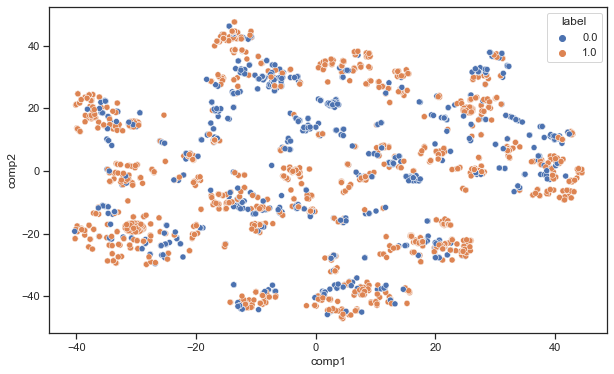

In [109]:
plt.figure(figsize = (10, 6))

df_tsne = pd.DataFrame(tsne_results, columns = ['comp1', 'comp2'])
df_tsne['label'] = A[:]
sns.scatterplot(x = 'comp1', y = 'comp2', data = df_tsne, hue = 'label')

plt.savefig('tsne_results.png')
plt.show();

The cluster above shows vague seggregation of classes with the t-SNE approach. This establishes that the PCA technique is more idealistic for predictions.

### Covariate Shift Check Between Train and Test Datasets

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/07/07230628/plot1.png)
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/07/07230044/Screenshot-from-2017-07-06-12-07-11-258x110.png)

With regards to drug trials and effectiveness, there exist a difference between the testing environments. Covariate shift check help detect discrepancies while prediciting the test features if the test features contain a different data distribution compared to the training data. Performing the covariate shift methodology, let us check if the difference between the train and test datasets actually exists ([source 7](https://www.analyticsvidhya.com/blog/2017/07/covariate-shift-the-hidden-problem-of-real-world-data-science/)).

* Label for predicting a strong adherence to testing dataset

In [110]:
train_data = train_dataset.copy()
test_data = test_dataset.copy()

In [111]:
train_data['label'] = 0
test_data['label'] = 1

In [112]:
training = train_data.drop('bioactivity_class', axis = 1)

* Combine test and train datasets

In [113]:
combine = training.append(test_data)
y = combine['label']
combine.drop(columns = ['label'], inplace=True)

* Applying the XGBClassifier model to finally test the presence of covariate shift

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
#?XGBClasifier

In [116]:
model_cov_sh = XGBClassifier()

In [117]:
drop_list = []

for col in combine.columns:
    score = cross_val_score(model_cov_sh,
                            pd.DataFrame(combine[col]),
                            y, cv = 3, scoring = 'roc_auc')
    #print(score)
    if (np.mean(score) > 0.8):
        drop_list.append(col)
        print("Column with covariate shift:", col)

In [118]:
if len(drop_list)==0: 
    print("No presence of covariate shift")

No presence of covariate shift


## Implimentation of XGBoostClassifier

XGBoost is short for Extreme Gradient Boosting ([source13](https://blog.quantinsti.com/xgboost-python/)). XGBoost is a machine learning library that uses gradient boosting under the hood. As XGBoost uses gradient boosting algorithms, therefore, it is both fast and accurate at the same time. It is said that XGBoost was developed to increase computational speed and optimize model performance. It is very efficient at handling huge datasets often having millions of instances. For this reason, XGBoost has become very popular in data science platforms like Kaggle.

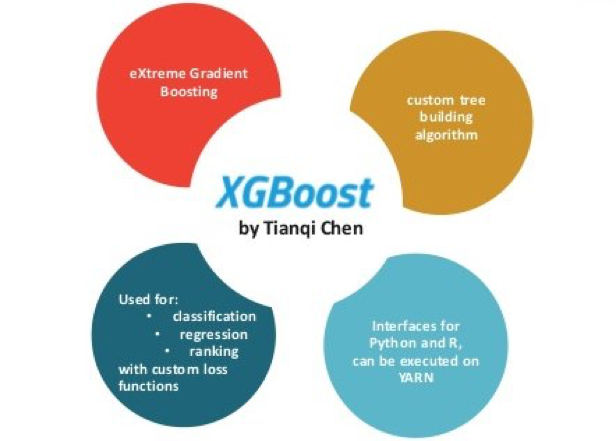

XGBoost uses a more regularized model formalization to control over-fitting, which gives it a better performance.

*What is boosting?*

The sequential ensemble methods, also known as “boosting”, creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence. The first model is built on training data, the second model improves the first model, the third model improves the second, and so on ([source12](https://debuggercafe.com/introduction-to-xgboost-in-python/)). 
![](https://d1rwhvwstyk9gu.cloudfront.net/2020/02/XG-Boost-FINAL-01.png)

In [119]:
model = XGBClassifier()

Let us make predictions and evaluate the model using `model.predict` command

In [120]:
%%time
model.fit(X, targets)

Wall time: 2.15 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
preds = model.predict(X)
preds

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### Evaluation

Let's evaluate the predictions using RMSE error.

In [122]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [123]:
rmse(preds, targets)

0.20481458886405557

## K Fold Cross Validation

Notice that we didn't create a validation set before training our model. We'll use a different validation strategy this time, called K-fold cross validation ([source 9](https://vitalflux.com/k-fold-cross-validation-python-example/)):

![](https://vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-15-at-11.13.53-AM.png)

K-Folds cross-validator provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default). Each fold is then used once as a validation while the k - 1 remaining folds form the training set ([source 8](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)).

Now, we can use the KFold utility to create the different training/validations splits and train a separate model for each fold.

In [124]:
from sklearn.model_selection import KFold

Let's define a helper function `train_and_evaluate` which trains a model the given parameters and returns the trained model, training accuracy and validation accuracy.

In [125]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBClassifier(random_state = 42, n_jobs = -1, **params)
    model.fit(X_train, train_targets)
    train_acc = metrics.accuracy_score(model.predict(X_train), train_targets)
    val_acc = metrics.accuracy_score(model.predict(X_val), val_targets)
    return model, train_acc, val_acc

In [126]:
kfold = KFold(n_splits = 10)

Now, we can use the `KFold` utility to create the different training/validations splits and train a separate model for each fold.

In [127]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_acc, val_acc = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets)
    
    models.append(model)
    print('Train acc: {}, Validation acc: {}'.format(train_acc, val_acc))

Train acc: 0.9623520975259949, Validation acc: 0.8096774193548387
Train acc: 0.9591251344567946, Validation acc: 0.8451612903225807
Train acc: 0.9619935460738616, Validation acc: 0.7193548387096774
Train acc: 0.9591251344567946, Validation acc: 0.8290322580645161
Train acc: 0.9605593402653281, Validation acc: 0.8258064516129032
Train acc: 0.9648619576909286, Validation acc: 0.8193548387096774
Train acc: 0.9591251344567946, Validation acc: 0.7677419354838709
Train acc: 0.9616349946217282, Validation acc: 0.6645161290322581
Train acc: 0.9609178917174614, Validation acc: 0.667741935483871
Train acc: 0.9637992831541219, Validation acc: 0.5533980582524272


Let's also define a function to average predictions from the 10 different models.

In [128]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis = 0)

We can now use `predict_avg` to make predictions for the test set.

In [129]:
preds = predict_avg(models, X)
preds

array([0.9, 1. , 0.9, ..., 0. , 0. , 0. ])

## Hyperparameter Tuning and Regularization

Just like other machine learning models, there are several hyperparameters we can to adjust the capacity of model and reduce overfitting.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

In [130]:
from sklearn.model_selection import RandomizedSearchCV

In [131]:
#?XGBClassifier

In [132]:
max_depth = [int(i) for i in np.linspace(start = 1, stop = 1000, num = 30)] # returns 30 numbers.
learning_rate = [float(i) for i in np.linspace(start = 0.0001 , stop = 1, num = 15)]
booster = ['gbtree']                                   
base_score = [0.6]
eval_metric = ['logloss', 'auc', 'aucpr']                                          

                                           
                                           
                                           
                                           
parameters = {'max_depth': max_depth,
              'learning_rate' : learning_rate,
              'booster' : booster,
              'base_score' : base_score,
              'eval_metric' : eval_metric}

In [133]:
#para_search = RandomizedSearchCV(estimator = model,
                                 #param_distributions = parameters,
                                 #verbose = 2,
                                 #random_state = 42,
                                 #n_jobs = -1)

In [134]:
#para_search.fit(X_train, train_targets);

In [135]:
#print(para_search.best_params_)

After fitting 5 folds for each of 10 candidates, totalling 50 fit, the bsest parameters are: {'max_depth': 517, 'learning_rate': 0.50003, 'eval_metric': 'logloss', 'booster': 'gbtree', 'base_score': 0.6}

Then applying the sought out best parameters' values, we implement it in the model.

In [136]:
model = XGBClassifier(max_depth = 517,
                      learning_rate = 0.50003,
                      booster = 'gbtree',
                      verbose = 2,
                      random_state = 42,
                      n_jobs = -1,
                      eval_metric = 'logloss',
                      base_score = 0.6)

In [137]:
model.fit(X_train, train_targets)

[06:18:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.6, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.50003,
              max_delta_step=0, max_depth=517, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbose=2, verbosity=None)

## Implementing Model on Test Dataset

In [138]:
y_pred = model.predict(X_test)

In [139]:
pred_probability = model.predict_proba(X_test)
pred_probability

array([[1.6896248e-02, 9.8310375e-01],
       [1.4082849e-02, 9.8591715e-01],
       [9.7986996e-01, 2.0130049e-02],
       ...,
       [1.3356209e-03, 9.9866438e-01],
       [5.3328276e-04, 9.9946672e-01],
       [5.4818392e-04, 9.9945182e-01]], dtype=float32)

In [140]:
from sklearn.metrics import log_loss

In [141]:
print("Log Loss Probability = ", log_loss(y_test, pred_probability))

Log Loss Probability =  0.12078396847219341


* Model Accuracy

In [142]:
Model_Accuracy = metrics.accuracy_score(y_test, y_pred)

Model_Accuracy = np.round(Model_Accuracy * 100, 2)

print("Model Accuracy is :", Model_Accuracy, end = '%')

Model Accuracy is : 94.84%

* ROC Curve, Precision and Recall Curve

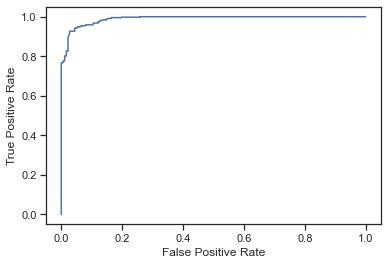

In [143]:
y_score = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label = model.classes_[1])
roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr).plot()

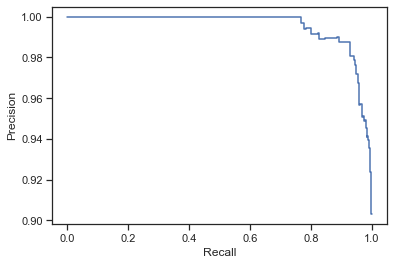

In [144]:
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label = model.classes_[1])
pr_display = PrecisionRecallDisplay(precision = prec, recall = recall).plot()

* Combining both plots

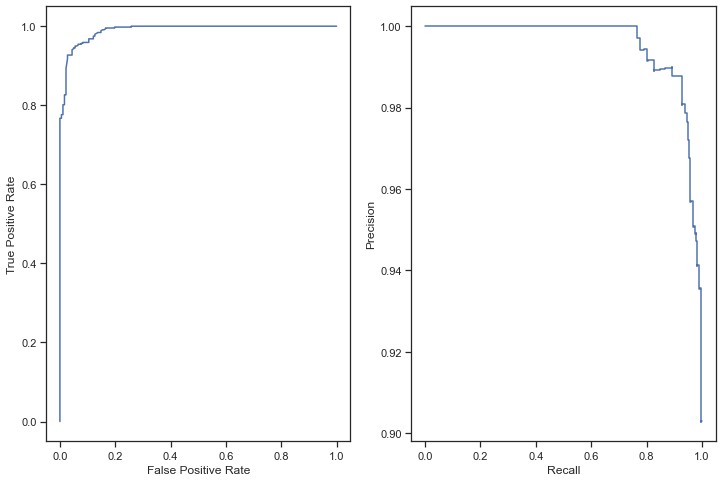

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))
roc_display.plot(ax = ax1)
pr_display.plot(ax = ax2)
plt.show()

In [146]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       182
           1       0.95      0.98      0.96       438

    accuracy                           0.95       620
   macro avg       0.95      0.93      0.94       620
weighted avg       0.95      0.95      0.95       620



F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of the Arithmetic Mean.

* Plot Confusion Matrix

In [147]:
from sklearn.metrics import confusion_matrix
import itertools

In [148]:
confusion_matrix(y_true = y_test, y_pred = y_pred)

array([[159,  23],
       [  9, 429]], dtype=int64)

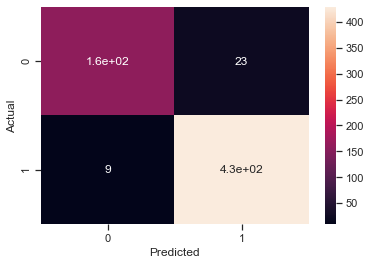

In [149]:
CM_data = {'y_Actual':    y_test,
           'y_Predicted': y_pred}

df = pd.DataFrame(data = CM_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

**OR, BETTER STILL**

Confusion matrix, without normalization
[[159  23]
 [  9 429]]


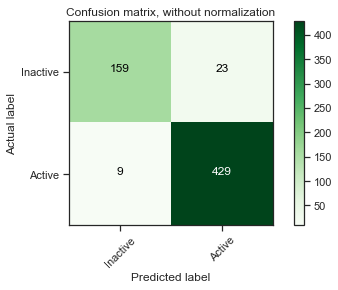

Normalized confusion matrix
[[0.87 0.13]
 [0.02 0.98]]


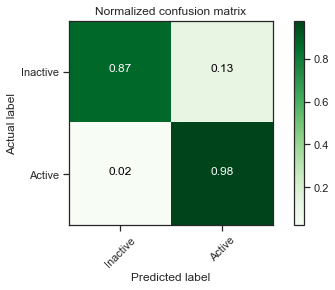

In [150]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(df['y_Actual'], df['y_Predicted'])
np.set_printoptions(precision = 2)

class_names = ['Inactive', 'Active']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names,
                      title = 'Confusion matrix, without normalization')
plt.savefig('Confusion_matrix_without_normalization.png')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, normalize = True, 
                      title = 'Normalized confusion matrix')
plt.savefig('Normalized_confusion_matrix.png')
plt.show()

* Matthew's Correlation Coefficient

In [151]:
from sklearn.metrics import matthews_corrcoef

In [152]:
matthews_corrcoef(y_test, y_pred)

0.8740531678585425

## Feature Importance

In [153]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending = False)

importance_df.head(20)

,feature,importance
590,PubchemFP590,0.129317
622,PubchemFP622,0.084091
561,PubchemFP561,0.049693
534,PubchemFP534,0.026390
580,PubchemFP580,0.023921
545,PubchemFP545,0.023615
536,PubchemFP536,0.018968
401,PubchemFP401,0.015993
488,PubchemFP488,0.014989
624,PubchemFP624,0.012726


Out of a whole lot of features that make up the input column, the above list features are the *`twenty (20)`* most important.

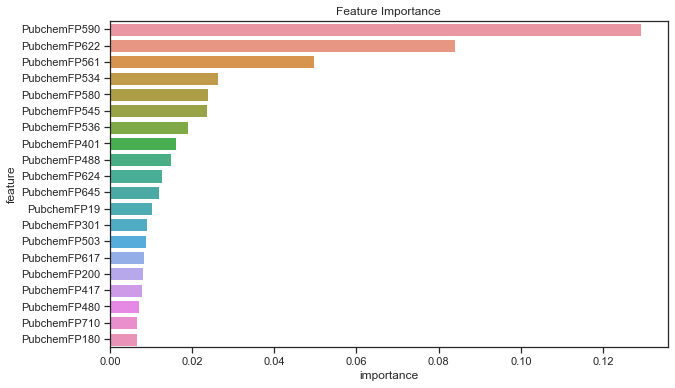

In [154]:
import seaborn as sns
plt.figure(figsize = (10,6))
plt.title('Feature Importance')
sns.barplot(data = importance_df.head(20), x = 'importance', y = 'feature')
plt.savefig('Feature_Importance.png')
plt.show();

Nevertheless, in a project that has to do with biomolecule response (drug manufacture, study and tests), all features have relative importances and relationship with themselves. Hence, all features are used to build the model.

## Visualization

In [155]:
import graphviz
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 30, 30

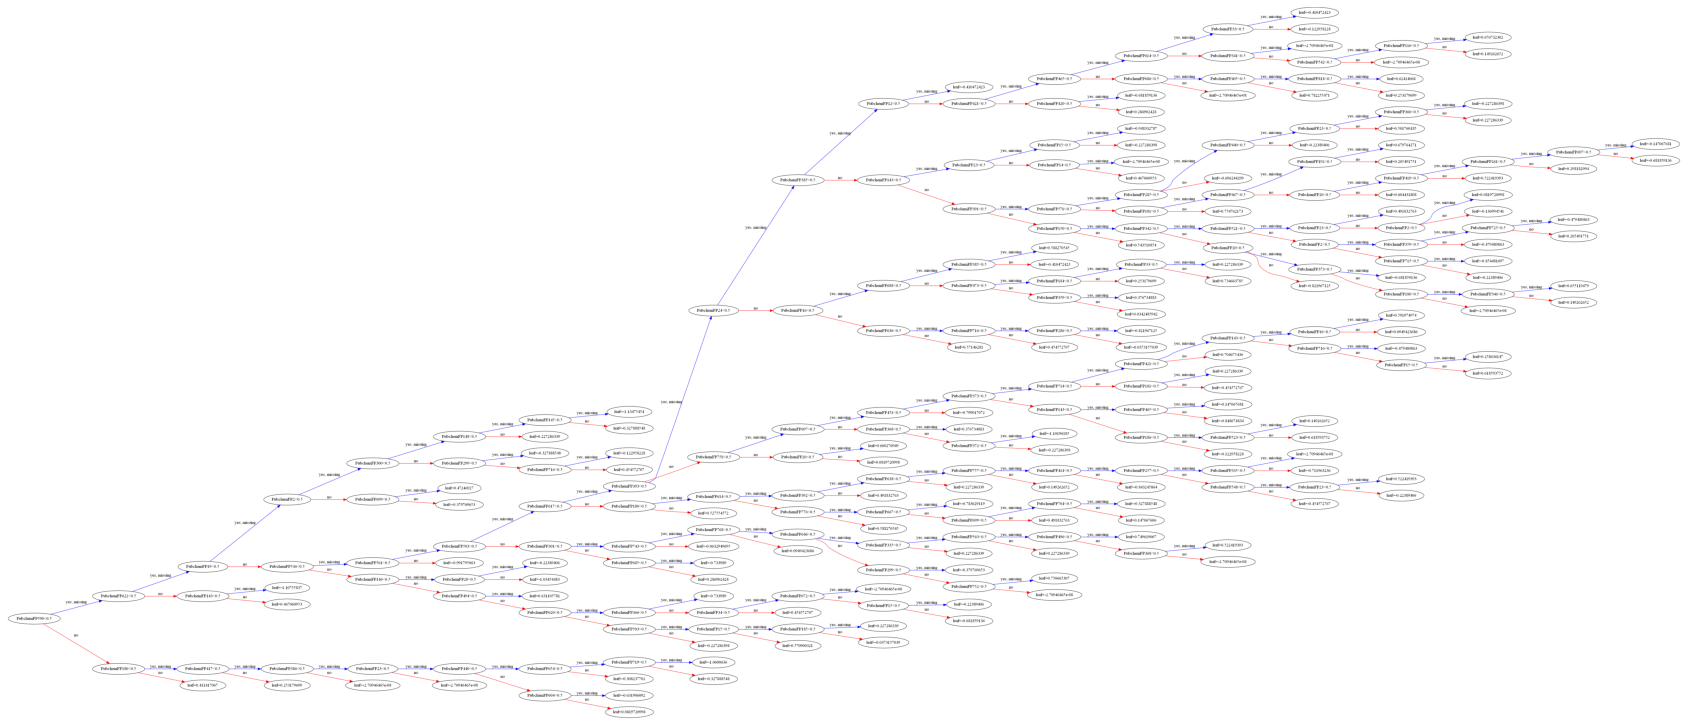

In [156]:
plot_tree(model, rankdir = 'LR');

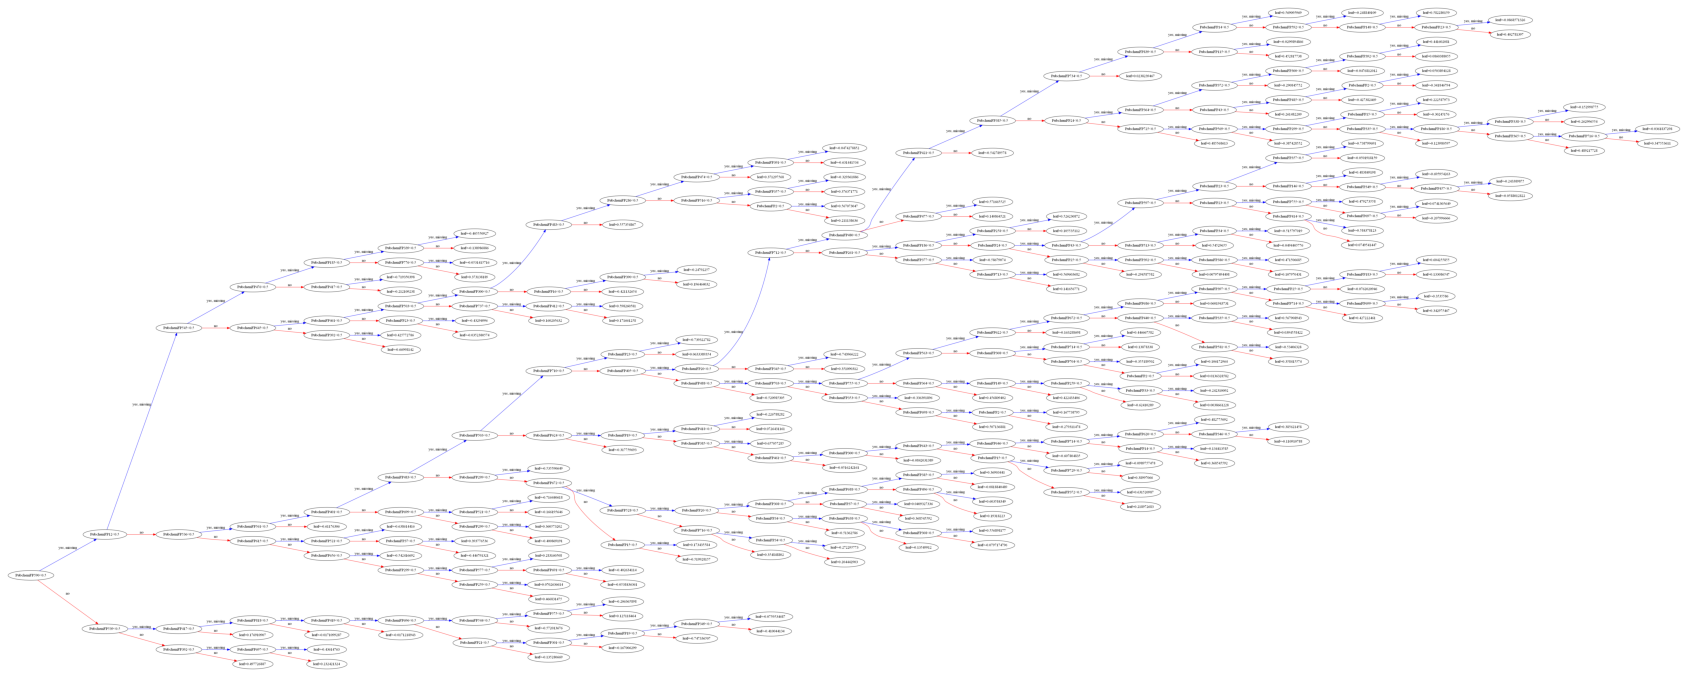

In [157]:
plot_tree(model, rankdir = 'LR', num_trees = 1);

## Result

In [158]:
Probability = pred_probability[:,1]
Molecule_ID = np.array(range(1,len(X_test)+1))

In [159]:
submission = pd.DataFrame()
submission['Molecule_ID'] = Molecule_ID
submission['Pred_Probability'] = Probability

In [160]:
submission.to_csv('CHEMBL230_BIOMOL_RESP.csv',index = None)
print(submission)

     Molecule_ID  Pred_Probability
0              1          0.983104
1              2          0.985917
2              3          0.020130
3              4          0.998411
4              5          0.996142
..           ...               ...
615          616          0.999863
616          617          0.996395
617          618          0.998664
618          619          0.999467
619          620          0.999452

[620 rows x 2 columns]


In [161]:
result = pd.read_csv('CHEMBL230_BIOMOL_RESP.csv')
result.head(15)

,Molecule_ID,Pred_Probability
0,1,0.983104
1,2,0.985917
2,3,0.020130
3,4,0.998411
4,5,0.996142
5,6,0.997518
6,7,0.998001
7,8,0.999471
8,9,0.999809
9,10,0.026733


## References

1. https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost
2. https://www.kaggle.com/vernondsouza123/predict-biological-response-through-lightgbm
3. https://www.datacamp.com/community/tutorials/random-forests-classifier-python
4. https://analyticsindiamag.com/guide-to-hyperparameters-tuning-using-gridsearchcv-and-randomizedsearchcv/
5. Guo Zhen-Hao, You Zhu-Hong, Huang De-Shuang, Yi Hai-Cheng, Chen Zhan-Heng & Wang Yan-Bin (2020). A learn based framework for diverse biomolecule relationship prediction in molecular association network. Communication Biology; 3, 118. https://doi.org/10.1038/s42003-020-0858-8 
6. Kroes, J. A., Zielhuis, S. W., van Roon, E. N., & ten Brinke, A. (2020). Prediction of response to biological treatment with monoclonal antibodies in severe asthma. Biochemical Pharmacology, 113978. doi:10.1016/j.bcp.2020.113978 
7. https://www.analyticsvidhya.com/blog/2017/07/covariate-shift-the-hidden-problem-of-real-world-data-science/
8. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
9. https://vitalflux.com/k-fold-cross-validation-python-example/)
10. Kuenzi Brent M., Park Jisoo, Samson H. Fong, Jason F. Kreisberg, Jianzhu Ma, Trey Ideker (2020). Predicting drug response and synergy using a deep leaning model of human cancer cells. Cancer Cell; 38, 1 - 13. doi: 10.1016/j.ccell.2020.09.014
11. Ali, M., & Aittokallio, T. (2018). Machine learning and feature selection for drug response prediction in precision oncology applications. Biophysical Reviews. doi:10.1007/s12551-018-0446-z 
12. https://debuggercafe.com/introduction-to-xgboost-in-python/